## tensorboard --logdir==training:/tmp/tflearn_logs --host=127.0.0.1

In [1]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tensorflow as tf

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:

import tflearn.datasets.mnist as mnist
X, Y, test_x, test_y = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [3]:
X = X.reshape([-1, 28, 28, 1])
test_x = test_x.reshape([-1, 28, 28, 1])

In [4]:
tf.reset_default_graph()
convnet = input_data(shape=[None, 28, 28, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 256, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 512, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)



convnet = fully_connected(convnet, 10, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=0.01, loss='categorical_crossentropy', name='targets')
model = tflearn.DNN(convnet, tensorboard_verbose=3)


In [8]:
model.load("MNIST_Model")

INFO:tensorflow:Restoring parameters from C:\Users\Shachi Shah\Tensorflow Tutorials\MNIST_Model


In [ ]:

model.fit({'input': X}, {'targets': Y}, n_epoch=1, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True)

Training Step: 85  | total loss: 1.34010 | time: 81.789s
| Adam | epoch: 001 | loss: 1.34010 - acc: 0.4422 -- iter: 05440/55000


In [7]:
model.save("MNIST_Model")

INFO:tensorflow:C:\Users\Shachi Shah\Tensorflow Tutorials\MNIST_Model is not in all_model_checkpoint_paths. Manually adding it.


## Test On Kaggle Data

In [9]:
import pandas as pd

In [ ]:
Kaggle_Test = pd.read_csv("MNIST_data/test.csv")

In [16]:
import numpy as np
Array_One = np.array(np.array(Kaggle_Test[0:1])[0])

In [22]:
import numpy as np

Kaggle_Test_Data = []
i=0
while i<len(Kaggle_Test):
    element = np.array(np.array(Kaggle_Test[i:i+1])[0])
    Kaggle_Test_Data.append(element)
    i+=1
Kaggle_Test_Data = np.array(Kaggle_Test_Data)

In [61]:
Kaggle_Train = pd.read_csv("MNIST_data/train.csv")
Kaggle_Train_y = vectorize(np.array(Kaggle_Train["label"]))
Kaggle_Train = Kaggle_Train.drop("label",1)

In [62]:
Kaggle_Train_x = []
i=0
while i<len(Kaggle_Train):
    element = np.array(np.array(Kaggle_Train[i:i+1])[0])
    Kaggle_Train_x.append(element)
    i+=1
Kaggle_Train_x = np.array(Kaggle_Train_x)

In [55]:
def pickle_data(train_x, train_y, test_x, Name):
    import pickle
    final_list = {'train_x':train_x, 'train_y':train_y, 'test_x':test_x}
    with open(Name,'wb') as f:
        pickle.dump(final_list,f)

In [60]:
def vectorize(ls):
    import numpy as np
    i=0
    out = []
    while i<len(ls):
        current=[0]*10
        current[ls[i]]=1
        current = np.array(current)
        out.append(current)
        i+=1
    out = np.array(out)
    return out

In [63]:
pickle_data(Kaggle_Train_x,Kaggle_Train_y,Kaggle_Test_Data,"MNIST_data/Kaggle_Dataset")

In [69]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [70]:
Kaggle_data = unpickle("MNIST_data/Kaggle_Dataset")

In [76]:
Kaggle_Train_x = Kaggle_data['train_x']
Kaggle_Train_y = Kaggle_data['train_y']

In [77]:
Kaggle_Train_x = Kaggle_Train_x.reshape([-1,28,28,1])

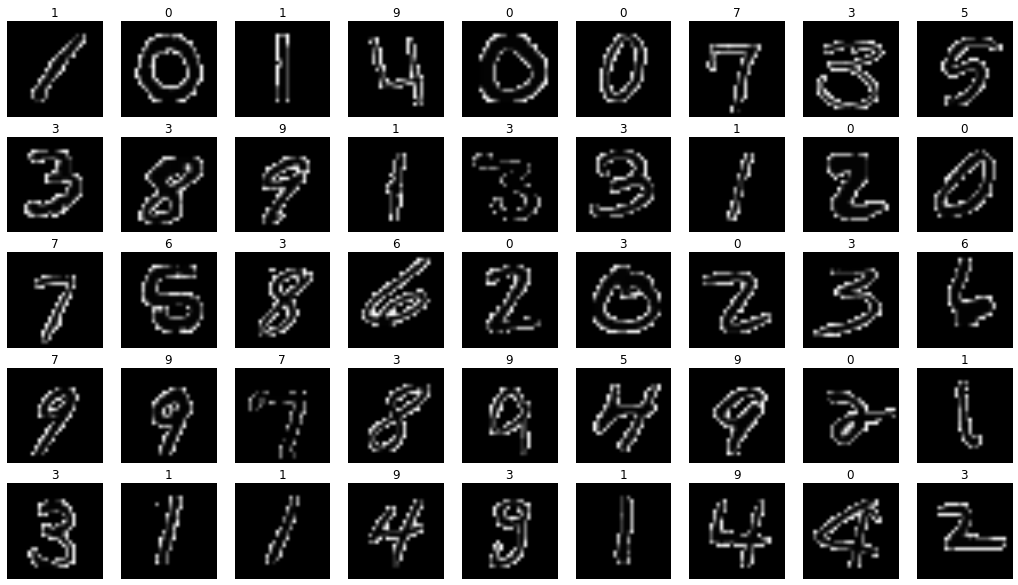

In [67]:
image_counter=0
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,10))
while image_counter<45:
    
    Image = makeimage(Kaggle_Train_x[image_counter])
        
    Feed_Data = np.array(Kaggle_Train_x[image_counter].reshape(28,28,1))
    model_out = np.argmax(model.predict([Feed_Data])[0])
    
    
    y = fig.add_subplot(5,9,image_counter+1)
    y.imshow(Image)
    plt.title(model_out)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    image_counter+=1
plt.show()

In [33]:
def makeimage(d1_array):
    import numpy as np
    d3_array=[]
    i=0
    while i<28:
        row=[]
        j=0
        while j<28:
            cell=[]
            k=0
            while k<3:
                cell.append(d1_array[i*28+j])
                k+=1
            row.append(np.array(cell))
            j+=1
        d3_array.append(np.array(row))
        i+=1
    d3_array = np.array(d3_array)
    return d3_array